In [1]:
import altair as alt
import numpy as np
import pandas as pd
import torch
from sklearn.decomposition import PCA
from transformers import CLIPModel, CLIPProcessor
import matplotlib.pyplot as plt

from utils.datasets import get_yoga_dataset, get_intel_scene_dataset, get_fruits_dataset
from utils.inference import get_embeddings_per_class

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
model.to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Yoga

In [3]:
yoga_classes = get_yoga_dataset()
yoga_emb, yoga_labels = get_embeddings_per_class(model, processor, yoga_classes, device)

Checking for yoga data in D:\Dropbox\Projects\clipsperiments\data\yoga.
Got 196 files for class Downdog.
Got 198 files for class Warrior2.
Got 198 files for class Tree.
Got 197 files for class Plank.
Got 199 files for class Goddess.


Fit a 2d PCA

In [4]:
yoga_2d_pca = PCA(n_components=3)
yoga_2d_pca.fit(yoga_emb)

PCA(n_components=3)

Let's take a look. Yeah... that's a total mess

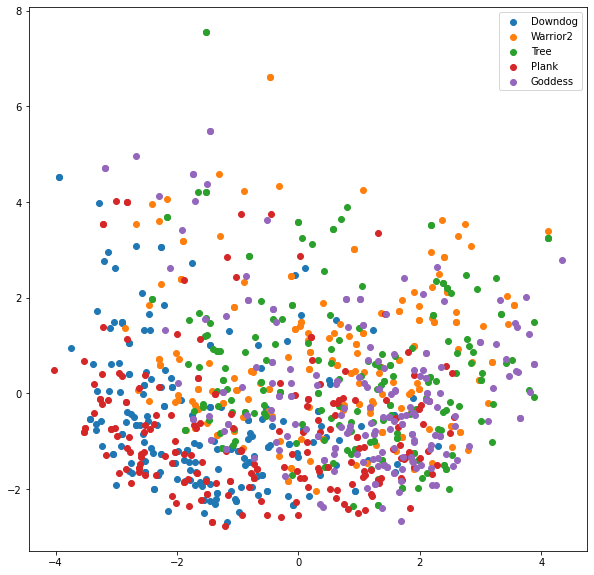

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
classes = list(yoga_classes.keys())
for i, cls in enumerate(yoga_classes.keys()):
    cls_emb = yoga_emb[(yoga_labels[:, np.newaxis] == i)[:, 0]]
    X = yoga_2d_pca.transform(cls_emb)
    ax.scatter(X[:, 0], X[:, 1], label=classes[i])
ax.legend()

Maybe it's better in 3d?

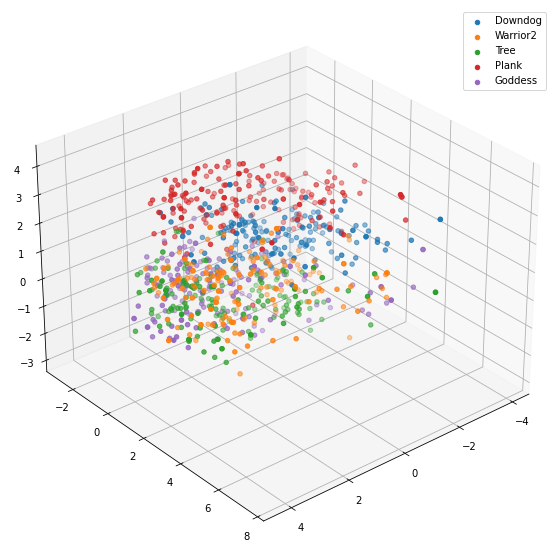

In [6]:
yoga_3d_pca = PCA(n_components=3)
yoga_3d_pca.fit(yoga_emb)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
classes = list(yoga_classes.keys())
for i, cls in enumerate(yoga_classes.keys()):
    cls_emb = yoga_emb[(yoga_labels[:, np.newaxis] == i)[:, 0]]
    X = yoga_3d_pca.transform(cls_emb)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], label=classes[i])

ax.view_init(30, 50)
ax.legend()

Eh, that's actually not too bad

# Scene

In [7]:
scene_classes = get_intel_scene_dataset(split="test")
scene_emb, scene_labels = get_embeddings_per_class(model, processor, scene_classes, device)

Checking for scene data in D:\Dropbox\Projects\clipsperiments\data\intel.
Got 437 files for class buildings.
Got 510 files for class sea.
Got 501 files for class street.
Got 525 files for class mountain.
Got 553 files for class glacier.
Got 474 files for class forest.


Way better in 2d

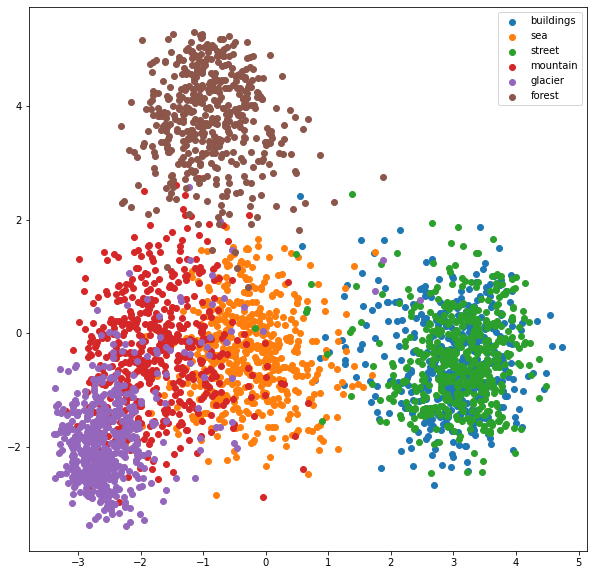

In [8]:
scene_2d_pca = PCA(n_components=2)
scene_2d_pca.fit(scene_emb)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
classes = list(scene_classes.keys())
for i, cls in enumerate(scene_classes.keys()):
    cls_emb = scene_emb[(scene_labels[:, np.newaxis] == i)[:, 0]]
    X = scene_2d_pca.transform(cls_emb)
    ax.scatter(X[:, 0], X[:, 1], label=classes[i])
ax.legend()

Can also try an altair plot if you want more interactivity

In [9]:
X = scene_2d_pca.transform(scene_emb)

classes = list(scene_classes.keys())
cls_names = [classes[i] for i in scene_labels]
source = pd.DataFrame.from_dict(
    {"x": X[:, 0],
     "y": X[:, 1],
     "class": cls_names,
     }
)
selection = alt.selection_multi(fields=['class'], bind='legend')
alt.Chart(source, width=600, height=600).mark_circle(size=50).encode(
    x='x',
    y='y',
    color="class",
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(selection).interactive()

alt.Chart(...)

Just as good in 3D

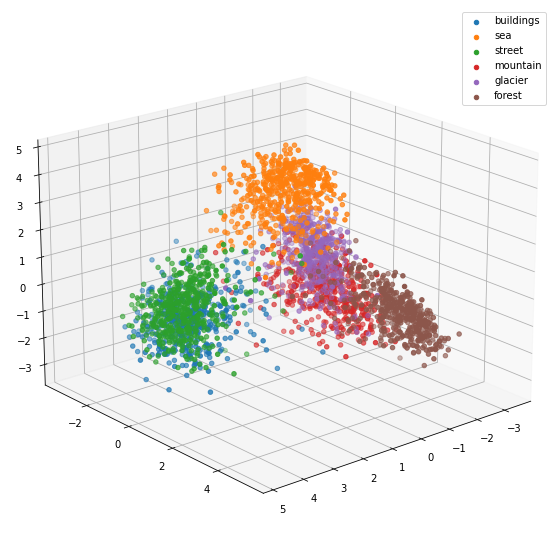

In [9]:
ax.legend()
scene_3d_pca = PCA(n_components=3)
scene_3d_pca.fit(scene_emb)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
classes = list(scene_classes.keys())
for i, cls in enumerate(scene_classes.keys()):
    cls_emb = scene_emb[(scene_labels[:, np.newaxis] == i)[:, 0]]
    X = scene_3d_pca.transform(cls_emb)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], label=classes[i])

ax.view_init(20, 50)
ax.legend()

# Fruits

In [10]:
fruits_classes = get_fruits_dataset("test")
fruits_emb, fruits_labels = get_embeddings_per_class(model, processor, fruits_classes, device)

Checking for scene data in D:\Dropbox\Projects\clipsperiments\data\fruits.
Got 157 files for class apple.
Got 160 files for class apple_braeburn.
Got 159 files for class apple_crimson_snow.
Got 466 files for class apple_golden.
Got 160 files for class apple_granny_smith.
Got 234 files for class apple_hit.
Got 156 files for class apple_pink_lady.
Got 453 files for class apple_red.
Got 150 files for class apple_red_delicios.
Got 154 files for class apple_red_yellow.
Got 159 files for class apple_rotten.
Got 47 files for class cabbage_white.
Got 50 files for class carrot.
Got 131 files for class cucumber.
Got 80 files for class eggplant_violet.
Got 234 files for class pear.
Got 80 files for class zucchini.
Got 80 files for class zucchini_dark.


Those pesky apples making everything difficult

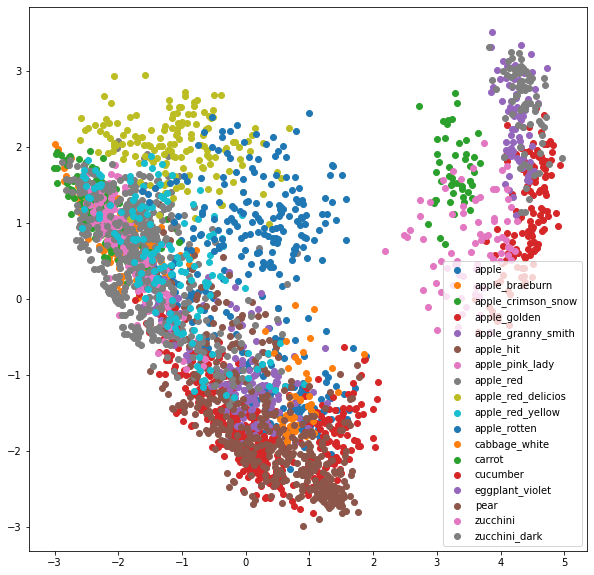

In [11]:
fruits_2d_pca = PCA(n_components=2)
fruits_2d_pca.fit(fruits_emb)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
classes = list(fruits_classes.keys())
for i, cls in enumerate(fruits_classes.keys()):
    cls_emb = fruits_emb[(fruits_labels[:, np.newaxis] == i)[:, 0]]
    X = fruits_2d_pca.transform(cls_emb)
    ax.scatter(X[:, 0], X[:, 1], label=classes[i])
ax.legend()

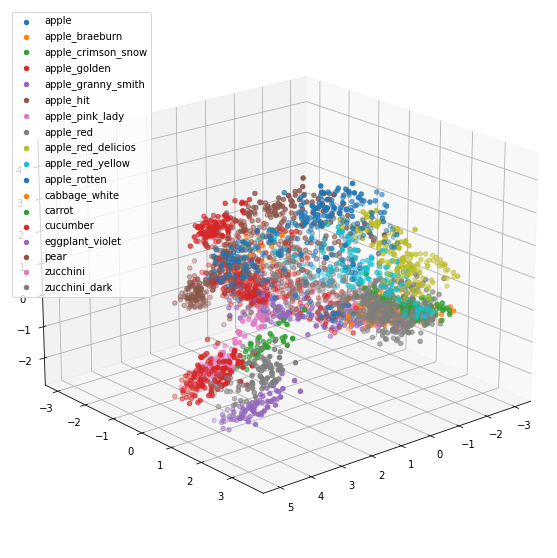

In [12]:
fruits_3d_pca = PCA(n_components=3)
fruits_3d_pca.fit(fruits_emb)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
classes = list(fruits_classes.keys())
for i, cls in enumerate(fruits_classes.keys()):
    cls_emb = fruits_emb[(fruits_labels[:, np.newaxis] == i)[:, 0]]
    X = fruits_3d_pca.transform(cls_emb)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], label=classes[i])

ax.view_init(20, 50)
ax.legend()

# Mix everything together

In [13]:
super_emb, super_labels = [yoga_emb], [yoga_labels]
super_emb.append(scene_emb)
super_labels.append(scene_labels + len(yoga_classes))
super_emb.append(fruits_emb)
super_labels.append(fruits_labels + len(yoga_classes) + len(scene_classes))
super_emb, super_labels = np.vstack(super_emb), np.hstack(super_labels)

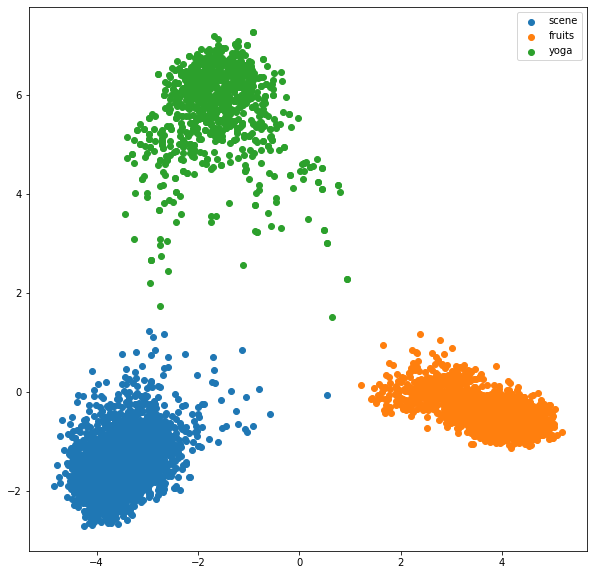

In [14]:
super_2d_pca = PCA(n_components=2)
super_2d_pca.fit(super_emb)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
X = super_2d_pca.transform(scene_emb)
ax.scatter(X[:, 0], X[:, 1], label="scene")

X = super_2d_pca.transform(fruits_emb)
ax.scatter(X[:, 0], X[:, 1], label="fruits")

X = super_2d_pca.transform(yoga_emb)
ax.scatter(X[:, 0], X[:, 1], label="yoga")

ax.legend()


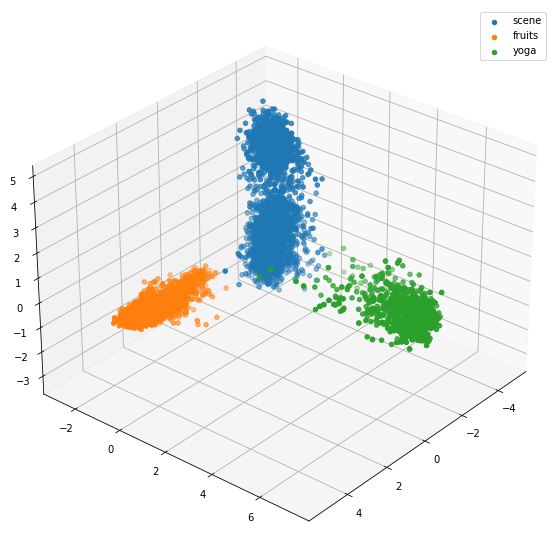

In [15]:
super_3d_pca = PCA(n_components=3)
super_3d_pca.fit(super_emb)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

X = super_3d_pca.transform(scene_emb)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], label="scene")

X = super_3d_pca.transform(fruits_emb)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], label="fruits")

X = super_3d_pca.transform(yoga_emb)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], label="yoga")

ax.legend()
ax.view_init(30, 40)